In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
#import in spread sheet with data
movie_data = pd.read_csv('Movie_budget_and_revenue_v3.csv')
movie_data.head()

,title,title.1,budget,revenue,RB Ratio,RT Score
0,Avatar,Avatar,237000000,2787965087,11.763566,0.82
1,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,300000000,961000000,3.203333,0.44
2,Spectre,Spectre,245000000,880674609,3.594590,0.63
3,The Dark Knight Rises,The Dark Knight Rises,250000000,1084939099,4.339756,0.87
4,John Carter,John Carter,260000000,284139100,1.092843,0.52


In [9]:
#dropping last 2 uselss columns
movie_data.drop(movie_data.tail(2).index,inplace=True)

In [10]:
len(movie_data["RB Ratio"])

2894

In [11]:
X = movie_data['RT Score'].values.reshape(-1, 1)
y = movie_data["RB Ratio"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (2894, 1) (2894, 1)


Text(0, 0.5, 'Revenue Over Budger')

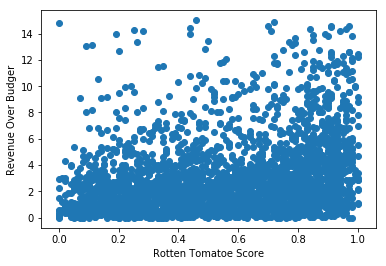

In [12]:
plt.scatter(X, y)
plt.xlabel("Rotten Tomatoe Score")
plt.ylabel("Revenue Over Budger")

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {round(mse, 4)}")
print(f"R-squared (R2 ): {round(r2,4)}")


Mean Squared Error (MSE): 8.1424
R-squared (R2 ): 0.0817


In [60]:
model.score(X_test, y_test)

0.08165788528417108

Text(0.5, 1.0, 'Box Office Performance vs. Rotten Tomatoe Score')

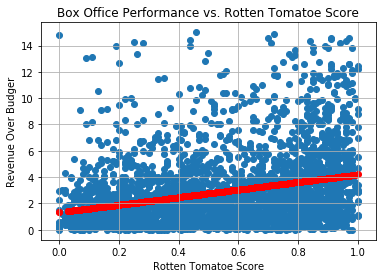

In [61]:
plt.scatter(X, y)
plt.xlabel("Rotten Tomatoe Score")
plt.ylabel("Revenue Over Budger")
plt.scatter(X_test, predicted, color = 'red')
plt.grid(True)
plt.title('Box Office Performance vs. Rotten Tomatoe Score')